In [ ]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Carrega o conjunto de dados Breast Cancer Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Tabela de SOMA: treine uma rede neural capaz de resolver um problema de SOMA entre X1 e X2. A estrutura deverá ser de 2 entradas com um neurônio, o qual gera uma saída. X1 será um valor de 1 a 1000 e X2 um valor de 1 a 1000.

In [ ]:
X1,X2,y = [],[],[]
for x1 in range(1,1001):
  for x2 in range(1,1001):
    result = x1+x2
    X1.append(x1)
    X2.append(x2)
    y.append(result)

tab_soma = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"y":y})
tab_soma.tail()

,X1,X2,y
999995,1000,996,1996
999996,1000,997,1997
999997,1000,998,1998
999998,1000,999,1999
999999,1000,1000,2000


In [ ]:
Xsoma = tab_soma[['X1','X2']]

In [ ]:
# Cria a estrutura da rede neural
modelSoma = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(Xsoma.shape[1],))
])
modelSoma.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelSoma.compile(optimizer='adam', loss='mean_squared_error')

history = modelSoma.fit(np.array([[X1[i],X2[i]] for i in range(0,1000000)]), np.array(y), epochs=1000, batch_size=50000, verbose=1)

Epoch 1/1000
20/20 [==============================] - 1s 4ms/step - loss: 962214.4375
Epoch 2/1000
20/20 [==============================] - 0s 5ms/step - loss: 921643.9375
Epoch 3/1000
20/20 [==============================] - 0s 4ms/step - loss: 882344.5625
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 844369.6875
Epoch 5/1000
20/20 [==============================] - 0s 5ms/step - loss: 807723.1875
Epoch 6/1000
20/20 [==============================] - 0s 5ms/step - loss: 772361.5000
Epoch 7/1000
20/20 [==============================] - 0s 4ms/step - loss: 738277.0625
Epoch 8/1000
20/20 [==============================] - 0s 5ms/step - loss: 705415.8125
Epoch 9/1000
20/20 [==============================] - 0s 5ms/step - loss: 673784.2500
Epoch 10/1000
20/20 [==============================] - 0s 5ms/step - loss: 643315.1250
Epoch 11/1000
20/20 [==============================] - 0s 4ms/step - loss: 614006.2500
Epoch 12/1000
20/20 [==============================]

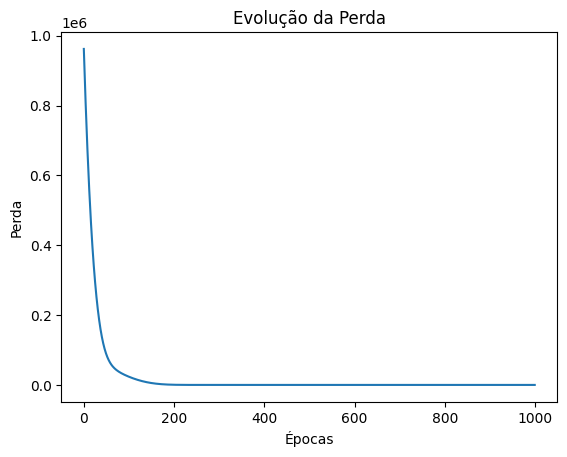

In [ ]:
# Extrai os valores da perda (loss) do histórico do treinamento
loss_values = history.history['loss']

# Cria um gráfico com a evolução da perda ao longo das épocas
plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

In [ ]:
y_pred = modelSoma.predict(np.array([[X1[i],X2[i]] for i in range(0,1000000)])).flatten()
tab_soma['Predito'] = y_pred
tab_soma.tail()

31250/31250 [==============================] - 43s 1ms/step


,X1,X2,y,Predito
999995,1000,996,1996,1995.999756
999996,1000,997,1997,1996.999756
999997,1000,998,1998,1997.999756
999998,1000,999,1999,1998.999756
999999,1000,1000,2000,1999.999756


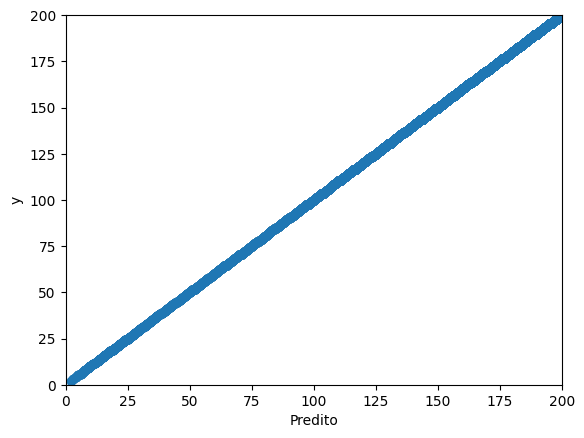

In [ ]:
# Criação do gráfico de dispersão
plt.scatter(tab_soma['Predito'], tab_soma['y'])

# Configuração dos rótulos dos eixos
plt.xlabel('Predito')
plt.ylabel('y')

# Configuração da escala dos eixos
plt.xlim(0, 200)
plt.ylim(0, 200)

# Exibição do gráfico
plt.show()

### Conclusao:

* Foi constatado que o erro chegou a praticamente em 0 na época aproximadamente em 250

2. Tabela de Multiplicação variada: crie uma rede neural capaz de resolver um problema de multiplicação X1 e X2. X1 será de 1 a 10 e X2 será de 1 a 100. A estrutura deverá ser de 2 entrada com um neurônio e uma saída.

In [ ]:
X1,X2,y = [],[],[]
for x1 in range(1,11):
  for x2 in range(1,101):
    result = x1*x2
    X1.append(x1)
    X2.append(x2)
    y.append(result)

tab_mult = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"y":y})
tab_mult.tail()

,X1,X2,y
995,10,96,960
996,10,97,970
997,10,98,980
998,10,99,990
999,10,100,1000


In [ ]:
Xmulti = tab_mult[['X1','X2']]

In [ ]:
# Cria a estrutura da rede neural
modelMult = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(Xmulti.shape[1],))
])
modelMult.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelMult.compile(optimizer='adam', loss='mean_squared_error')

history = modelMult.fit(np.array([[X1[i],X2[i]] for i in range(0,len(Xmulti))]), np.array(y), epochs=2000, batch_size=250, verbose=1)

Epoch 1/2000
4/4 [==============================] - 1s 4ms/step - loss: 96466.8281
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 96329.8438
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 96195.3203
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 96055.7266
Epoch 5/2000
4/4 [==============================] - 0s 4ms/step - loss: 95923.7500
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 95785.5078
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 95651.9141
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 95517.7109
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 95379.8047
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 95246.7500
Epoch 11/2000
4/4 [==============================] - 0s 3ms/step - loss: 95112.2188
Epoch 12/2000
4/4 [==============================] - 0s 3ms/step - loss: 94977.1719
E

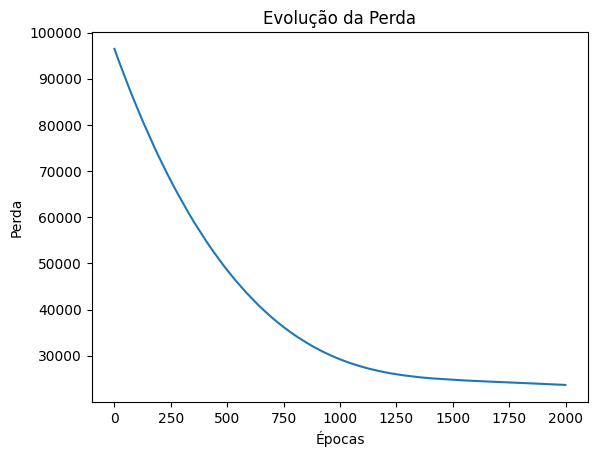

In [ ]:
# Extrai os valores da perda (loss) do histórico do treinamento
loss_values = history.history['loss']

# Cria um gráfico com a evolução da perda ao longo das épocas
plt.plot(loss_values)
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

### Conclusão EX 2:

* O erro continuou alto, portanto não previu corretamente

### ATIVIDADE 4

Considere a tabela abaixo.

Quando x3 for == 1, é realizada uma operação de multiplicação. Quando x3 == 2, é realizada uma soma.

Crie uma rede neural que receba como parâmetro X1, X2 e X3 e tenha como saída y. A rede deverá ser multi-layer perceptron.

Gere o gráfico de perda e calcule o erro do modelo. Faça testes para avaliar se a rede é capaz de acertar quanto os valores de x1 e x2 forem maiores que 100.

In [ ]:
X1,X2,X3,y = [],[],[],[]
for x1 in range(1,101):
  for x2 in range(1,101):
    for x3 in range(1,3):
      if x3 == 1:
        result = x1*x2
      else:
        result = x1+x2
      X1.append(x1)
      X2.append(x2)
      X3.append(x3)
      y.append(result)

tab_mult_soma = pd.DataFrame.from_dict(data={"X1":X1,"X2":X2,"X3":X3,"y":y})
tab_mult_soma.tail()

,X1,X2,X3,y
19995,100,98,2,198
19996,100,99,1,9900
19997,100,99,2,199
19998,100,100,1,10000
19999,100,100,2,200


In [ ]:
X = tab_mult_soma[['X1','X2', 'X3']]

In [ ]:
# Crie o modelo sequencial
model41 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model41.add(tf.keras.layers.Dense(2, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model41.add(tf.keras.layers.Dense(2, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model41.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model41.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model41.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Incluind early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history = model41.fit(np.array([[X1[i],X2[i],X3[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
4/4 [==============================] - 2s 13ms/step - loss: 5821929.0000
Epoch 2/2000
4/4 [==============================] - 0s 7ms/step - loss: 5819254.5000
Epoch 3/2000
4/4 [==============================] - 0s 5ms/step - loss: 5816628.0000
Epoch 4/2000
4/4 [==============================] - 0s 5ms/step - loss: 5814030.5000
Epoch 5/2000
4/4 [==============================] - 0s 6ms/step - loss: 5811498.0000
Epoch 6/2000
4/4 [==============================] - 0s 5ms/step - loss: 5808997.0000
Epoch 7/2000
4/4 [==============================] - 0s 5ms/step - loss: 5806547.5000
Epoch 8/2000
4/4 [==============================] - 0s 5ms/step - loss: 5804139.5000
Epoch 9/2000
4/4 [==============================] - 0s 5ms/step - loss: 5801769.5000
Epoch 10/2000
4/4 [==============================] - 0s 8ms/step - loss: 5799449.5000
Epoch 11/2000
4/4 [==============================] - 0s 6ms/step - loss: 5797191.5000
Epoch 12/2000
4/4 [==============================] - 0s 6ms/st

In [ ]:
# Crie o modelo sequencial
model42 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model42.add(tf.keras.layers.Dense(6, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model42.add(tf.keras.layers.Dense(6, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model42.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model42.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model42.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 24        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history2 = model42.fit(np.array([[X1[i],X2[i],X3[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
4/4 [==============================] - 2s 13ms/step - loss: 5706991.0000
Epoch 2/2000
4/4 [==============================] - 0s 8ms/step - loss: 5694224.0000
Epoch 3/2000
4/4 [==============================] - 0s 7ms/step - loss: 5681516.0000
Epoch 4/2000
4/4 [==============================] - 0s 6ms/step - loss: 5668757.5000
Epoch 5/2000
4/4 [==============================] - 0s 6ms/step - loss: 5656117.5000
Epoch 6/2000
4/4 [==============================] - 0s 6ms/step - loss: 5643399.0000
Epoch 7/2000
4/4 [==============================] - 0s 7ms/step - loss: 5630685.5000
Epoch 8/2000
4/4 [==============================] - 0s 6ms/step - loss: 5617897.5000
Epoch 9/2000
4/4 [==============================] - 0s 5ms/step - loss: 5604986.5000
Epoch 10/2000
4/4 [==============================] - 0s 7ms/step - loss: 5592007.0000
Epoch 11/2000
4/4 [==============================] - 0s 6ms/step - loss: 5579010.0000
Epoch 12/2000
4/4 [==============================] - 0s 6ms/st

In [ ]:
# Crie o modelo sequencial
model43 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model43.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model43.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model43.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model43.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model43.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model43.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model43.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 16        
                                                                 
 dense_10 (Dense)            (None, 16)                80        
                                                                 
 dense_11 (Dense)            (None, 32)                544       
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history3 = model43.fit(np.array([[X1[i],X2[i],X3[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
4/4 [==============================] - 3s 21ms/step - loss: 5660374.0000
Epoch 2/2000
4/4 [==============================] - 0s 6ms/step - loss: 5545639.0000
Epoch 3/2000
4/4 [==============================] - 0s 8ms/step - loss: 5426076.0000
Epoch 4/2000
4/4 [==============================] - 0s 6ms/step - loss: 5293694.5000
Epoch 5/2000
4/4 [==============================] - 0s 6ms/step - loss: 5145099.5000
Epoch 6/2000
4/4 [==============================] - 0s 6ms/step - loss: 4973494.5000
Epoch 7/2000
4/4 [==============================] - 0s 6ms/step - loss: 4777677.5000
Epoch 8/2000
4/4 [==============================] - 0s 7ms/step - loss: 4555668.0000
Epoch 9/2000
4/4 [==============================] - 0s 7ms/step - loss: 4308635.5000
Epoch 10/2000
4/4 [==============================] - 0s 7ms/step - loss: 4045053.2500
Epoch 11/2000
4/4 [==============================] - 0s 7ms/step - loss: 3780352.0000
Epoch 12/2000
4/4 [==============================] - 0s 8ms/st

In [ ]:
# Crie o modelo sequencial
model44 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model44.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(256, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model44.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a primeira camada oculta
model44.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a camada de saída
model44.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model44.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model44.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 16        
                                                                 
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)               8320      
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 128)              

In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history4 = model44.fit(np.array([[X1[i],X2[i],X3[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
4/4 [==============================] - 6s 30ms/step - loss: 5274655.0000
Epoch 2/2000
4/4 [==============================] - 0s 11ms/step - loss: 3688306.7500
Epoch 3/2000
4/4 [==============================] - 0s 10ms/step - loss: 3442347.2500
Epoch 4/2000
4/4 [==============================] - 0s 10ms/step - loss: 3179965.2500
Epoch 5/2000
4/4 [==============================] - 0s 7ms/step - loss: 3297740.0000
Epoch 6/2000
4/4 [==============================] - 0s 10ms/step - loss: 3132758.7500
Epoch 7/2000
4/4 [==============================] - 0s 9ms/step - loss: 3164333.2500
Epoch 8/2000
4/4 [==============================] - 0s 11ms/step - loss: 3100822.2500
Epoch 9/2000
4/4 [==============================] - 0s 7ms/step - loss: 3127792.7500
Epoch 10/2000
4/4 [==============================] - 0s 10ms/step - loss: 3092357.2500
Epoch 11/2000
4/4 [==============================] - 0s 7ms/step - loss: 3100386.0000
Epoch 12/2000
4/4 [==============================] - 0s 

In [ ]:
# Crie o modelo sequencial
model45 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model45.add(tf.keras.layers.Dense(4, activation='relu', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(16, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(16, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model45.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model45.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model45.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model45.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 4)                 16        
                                                                 
 dense_138 (Dense)           (None, 16)                80        
                                                                 
 dense_139 (Dense)           (None, 16)                272       
                                                                 
 dense_140 (Dense)           (None, 32)                544       
                                                                 
 dense_141 (Dense)           (None, 32)                1056      
                                                                 
 dense_142 (Dense)           (None, 64)                2112      
                                                                 
 dense_143 (Dense)           (None, 64)              

In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history5 = model45.fit(np.array([[X1[i],X2[i],X3[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.05*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
20/20 [==============================] - 4s 6ms/step - loss: 4763654.0000
Epoch 2/2000
20/20 [==============================] - 0s 6ms/step - loss: 3308892.0000
Epoch 3/2000
20/20 [==============================] - 0s 6ms/step - loss: 3218166.2500
Epoch 4/2000
20/20 [==============================] - 0s 6ms/step - loss: 3204115.7500
Epoch 5/2000
20/20 [==============================] - 0s 6ms/step - loss: 3185564.2500
Epoch 6/2000
20/20 [==============================] - 0s 7ms/step - loss: 3165659.7500
Epoch 7/2000
20/20 [==============================] - 0s 6ms/step - loss: 3140792.2500
Epoch 8/2000
20/20 [==============================] - 0s 6ms/step - loss: 3119112.0000
Epoch 9/2000
20/20 [==============================] - 0s 6ms/step - loss: 3103574.0000
Epoch 10/2000
20/20 [==============================] - 0s 6ms/step - loss: 3068127.0000
Epoch 11/2000
20/20 [==============================] - 0s 6ms/step - loss: 3025152.5000
Epoch 12/2000
20/20 [====================

In [ ]:
# Crie o modelo sequencial
model46 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model46.add(tf.keras.layers.Dense(4, activation='linear', input_shape=(X.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(16, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(16, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(32, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(64, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(128, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(256, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(512, activation='linear')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a segunda camada oculta
model46.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model46.add(tf.keras.layers.Dense(1, activation='linear')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model46.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
model46.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 4)                 16        
                                                                 
 dense_152 (Dense)           (None, 16)                80        
                                                                 
 dense_153 (Dense)           (None, 16)                272       
                                                                 
 dense_154 (Dense)           (None, 32)                544       
                                                                 
 dense_155 (Dense)           (None, 32)                1056      
                                                                 
 dense_156 (Dense)           (None, 64)                2112      
                                                                 
 dense_157 (Dense)           (None, 64)              

In [ ]:
# Treina o modelo: obs: se processar essa parte múltiplas vezes, o modelo continua de onde parou.
#Ex. 1a rodada: epoch 50, 2a rodada: epoch 51-100, ...
history6 = model46.fit(np.array([[X1[i],X2[i],X3[i]] for i in range(0,len(X))]), np.array(y), epochs=2000, batch_size=int(0.05*len(X)), verbose=1,
                    callbacks=[early_stopping_callback])

Epoch 1/2000
20/20 [==============================] - 5s 8ms/step - loss: 4042398.0000
Epoch 2/2000
20/20 [==============================] - 0s 8ms/step - loss: 2941200.0000
Epoch 3/2000
20/20 [==============================] - 0s 8ms/step - loss: 2750726.7500
Epoch 4/2000
20/20 [==============================] - 0s 8ms/step - loss: 2687241.7500
Epoch 5/2000
20/20 [==============================] - 0s 8ms/step - loss: 2551321.0000
Epoch 6/2000
20/20 [==============================] - 0s 7ms/step - loss: 2030603.0000
Epoch 7/2000
20/20 [==============================] - 0s 7ms/step - loss: 3055598.5000
Epoch 8/2000
20/20 [==============================] - 0s 8ms/step - loss: 1675522.0000
Epoch 9/2000
20/20 [==============================] - 0s 8ms/step - loss: 936432.9375
Epoch 10/2000
20/20 [==============================] - 0s 5ms/step - loss: 1320182.6250
Epoch 11/2000
20/20 [==============================] - 0s 6ms/step - loss: 827230.5625
Epoch 12/2000
20/20 [======================

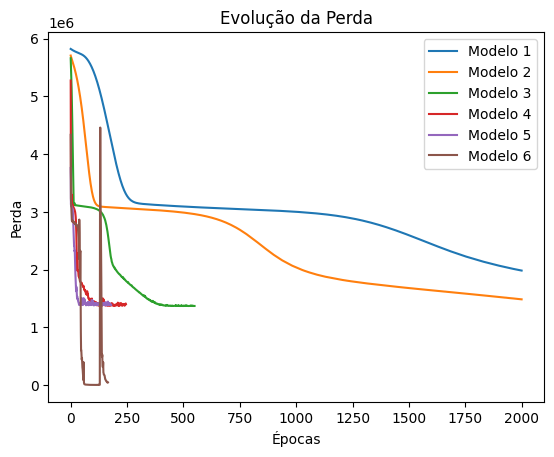

In [ ]:
# Extrai os valores da perda de cada histórico de treinamento
loss_values1 = history.history['loss']
loss_values2 = history2.history['loss']
loss_values3 = history3.history['loss']
loss_values4 = history4.history['loss']
loss_values5 = history5.history['loss']
loss_values6 = history6.history['loss']

# Cria um gráfico com a evolução da perda ao longo das épocas para cada histórico
plt.plot(loss_values1, label='Modelo 1')
plt.plot(loss_values2, label='Modelo 2')
plt.plot(loss_values3, label='Modelo 3')
plt.plot(loss_values4, label='Modelo 4')
plt.plot(loss_values5, label='Modelo 5')
plt.plot(loss_values6, label='Modelo 6')

plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()  # Adiciona uma legenda com os rótulos dos históricos
plt.show()

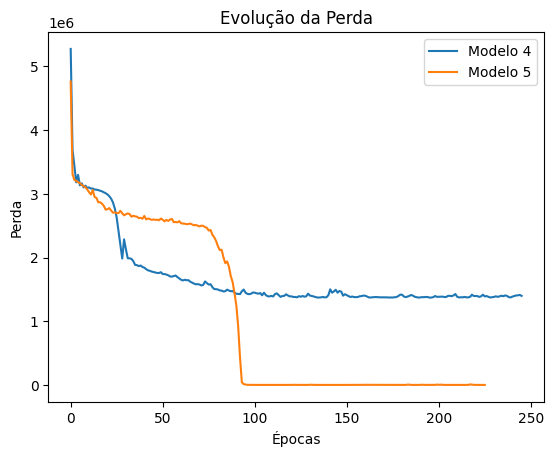

In [ ]:
loss_values4 = history4.history['loss']
loss_values5 = history5.history['loss']
#loss_values6 = history6.history['loss']



plt.plot(loss_values4, label='Modelo 4')
plt.plot(loss_values5, label='Modelo 5')
#plt.plot(loss_values6, label='Modelo 6')

plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()  # Adiciona uma legenda com os rótulos dos históricos
plt.show()